In [82]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('MatplotLib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.15.4
Pandas: 0.23.4
MatplotLib: 3.0.2
Seaborn: 0.9.0
Scipy: 1.1.0
Sklearn: 0.20.1


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data = pd.read_csv('dataset.csv')

In [85]:
print(data.columns)

Index(['Latitude', 'Longitude', 'Time', 'Class'], dtype='object')


In [86]:
print(data.shape)

(363000, 4)


In [87]:
print(data.describe())

            Latitude      Longitude           Time          Class
count  363000.000000  363000.000000  363000.000000  363000.000000
mean       12.936868      75.082439   25552.183055       0.008264
std         2.188508      16.435607   17619.029918       0.090533
min         0.000574       0.002848       0.000000       0.000000
25%        12.891631      79.987924   11884.000000       0.000000
50%        12.979107      80.078587   23782.000000       0.000000
75%        13.067435      80.168883   35642.000000       0.000000
max        24.999657      80.259998   86399.000000       1.000000


In [88]:
data = data.sample(frac = 1, random_state = 1)

print(data.shape)

(363000, 4)


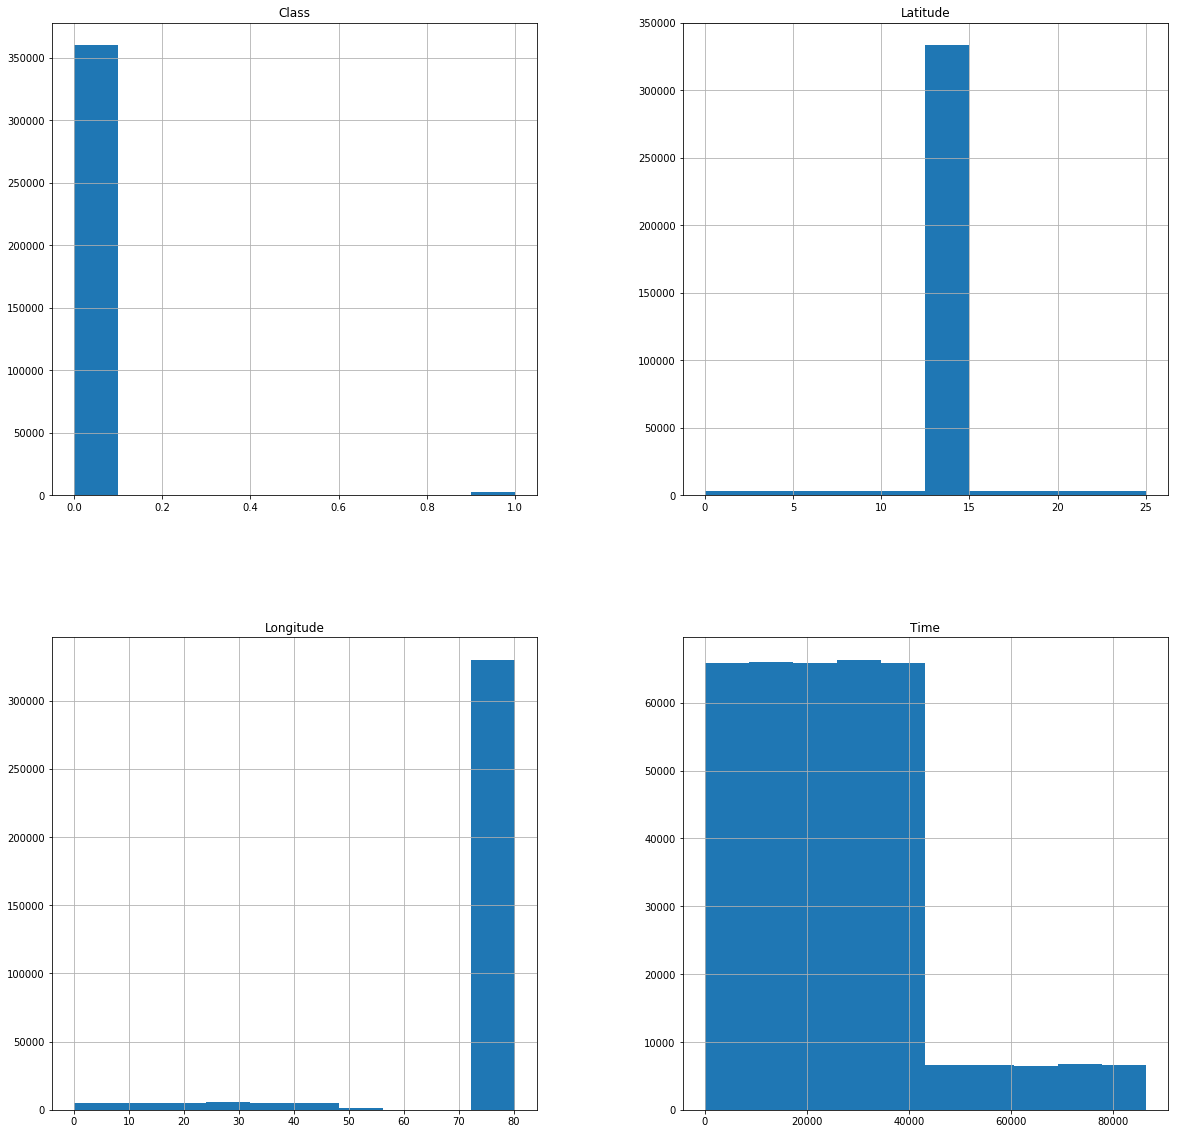

In [89]:
data.hist(figsize = (20, 20))
plt.show()

In [90]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print('Outlier fraction: {}\nFraud Cases: {}\nValid Cases: {}'.format(outlier_fraction, len(Fraud), len(Valid)))

Outlier fraction: 0.008333333333333333
Fraud Cases: 3000
Valid Cases: 360000


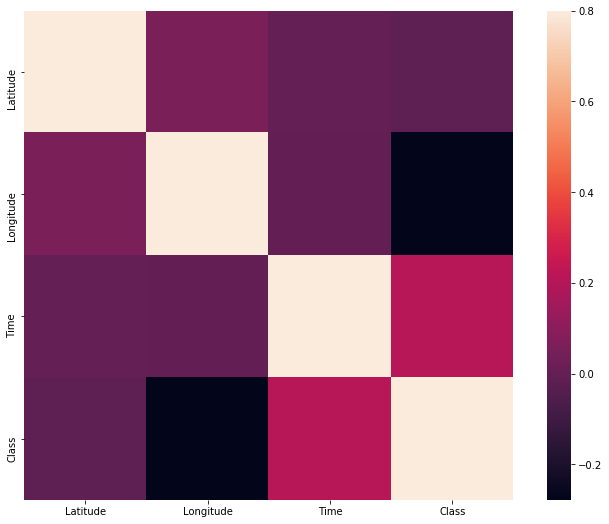

In [91]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [92]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

target = "Class"

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(363000, 3)
(363000,)


In [93]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X),
                                        contamination = outlier_fraction,
                                        random_state = state,
                                       behaviour = "new"),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors=50,
    contamination=outlier_fraction)
}

In [101]:
n_outliers = len(Fraud)

clf = classifiers['Isolation Forest']
clf.fit(X)
scores_pred = clf.decision_function(X)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format(clf_name, n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

Local Outlier Factor: 1891
0.9947906336088155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    360000
           1       0.68      0.69      0.69      3000

   micro avg       0.99      0.99      0.99    363000
   macro avg       0.84      0.84      0.84    363000
weighted avg       0.99      0.99      0.99    363000



In [102]:
import pickle

In [103]:
print(classifiers['Isolation Forest'])

IsolationForest(behaviour='new', bootstrap=False,
        contamination=0.008333333333333333, max_features=1.0,
        max_samples=363000, n_estimators=100, n_jobs=None, random_state=1,
        verbose=0)


In [104]:
model_file = open('classifier.pkl','wb')
pickle.dump(clf, model_file)
model_file.close()

In [107]:
load_file = open('classifier.pkl','rb')
classifier = pickle.load(load_file)
scores_pred = classifier.decision_function(X)
y_pred = classifier.predict(X)


In [108]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format("Isolation Forest", n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

Isolation Forest: 1891
0.9947906336088155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    360000
           1       0.68      0.69      0.69      3000

   micro avg       0.99      0.99      0.99    363000
   macro avg       0.84      0.84      0.84    363000
weighted avg       0.99      0.99      0.99    363000



In [112]:
Z = [['12.8','80.1','15000']]
y_pred = classifier.predict(Z)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
#n_errors = (y_pred != Y).sum()
#print("{}: {}".format("Isolation Forest", n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

C:\Users\gouth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\gouth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [363000, 1]